In [10]:
include("Pnjl_TT.jl")
using Plots

In [79]:



X0 = [-0.01, -0.01, -0.42, 0.8, 0.8]  # phi_u, phi_d, phi_s, Phi1, Phi2


T = 109/hc
mu_B = 850/hc

function logg(p)
#-0.54808	-0.54808	-1.96765	0.45562	0.47564
    X0 = [-0.54808, -0.54808, -1.96765, 0.45562, 0.47564]  # phi_u, phi_d, phi_s, Phi1, Phi2
    phi = X0[1:3]
    Phi1 = X0[4]
    Phi2 = X0[5]
    Masses = Mass(phi) # 三种夸克有效质量
    mu = mu_B / 3.0
    log_sum = 0.0
    for flavor = 1:3

        mass = Masses[flavor] # 当前味道夸克的有效质量
        E = sqrt.(p.^2 .+ (mass)^2)
        E_minus = (E .- mu) ./ T
        E_plus = (E .+ mu) ./ T

    
        log_sum += p.^2 .* log_q.(AA.(E_minus, Phi1, Phi2,q), q) .+ log_q.(AAbar.(E_plus, Phi1, Phi2,q), q)
        
    end
    return log_sum

end

logg (generic function with 1 method)

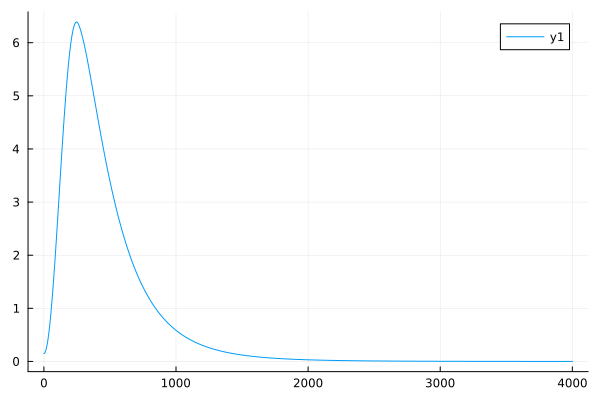

In [86]:

q = 1.10
ps = range(0.0, stop=4000, length=1000)







log_values = logg.(ps/hc)



plot(ps, log_values)

In [90]:
ints = get_nodes_hard(10, 120;IR=100.0)
p2, w2 = ints[2]
log_2 = logg.(p2)
int_get = sum(log_2 .* w2) 

6.433345488199683